# Análisis con CHIP-seq y RNA-seq con Pyntegrate

En este ejemplo se va a ver como realizar un análisis de CHIP-seq para posteriormente juntarlo con RNA-seq.

Lo primero que se ha de hacer es importan las librerías que van a ser necesarias.

In [3]:
import os
import Pyntegrate
import matplotlib.pyplot as plt
import numpy as np

Una vez se tienen las librerías, se va a ejecutar una función que tiene el sigueinte funcionamiento:
Se van a calcular los intervalos de las transcripciones (tsses) y posteriromente se van a extender estas trasncripcions 1000 bases (tsses_1kb)
Una vez se tienen estos archivos de transcripciones, se procede a cargar los valores de las señales de IP y de INPUT de CHIP-seq y se guardarán estos valores en la variable arrays.
Es importante indicar el genoma con el que operar(en mi caso es mm10 al estar usando datos de ratón)

In [5]:
bins = 100
features, arrays, tsses, tsses_1kb = Pyntegrate.SeqSignalAnalysis.generate_arrays_features_from_tsses_from_db(dbPath='/home/jerry/Documentos/Python3.10/prueba/data/gencode.vM25.annotation.gtf.db', 
                                                                                                              ipSignalPath='/home/jerry/Documentos/Python3.10/prueba/realData/SRR1204544_sort_nondup.bw', 
                                                                                                              extensionIp='bigwig',
                                                                                                              inputSignalPath='/home/jerry/Documentos/Python3.10/prueba/realData/SRR1204546_sort_nondup.bw',
                                                                                                              extensionInput='bigwig', 
                                                                                                              genome='mm10', 
                                                                                                              bins=bins)

<Pyntegrate._genomic_signal.BigWigSignal object at 0x756c505cdb40> <Pyntegrate._genomic_signal.BigWigSignal object at 0x756c505cd3f0>


Una vez se tienen los valores de las señales de IP e INPUT de IP, vamos a quedarnos en una variable solamente con los valores de la señal para hacer el primer análisis con CHIP-seq. Esta gráfica consiste en ver la distancia que existe entre los valores de IP y de INPUT del TSS.
Para ello se tiene que ejecutar el siguiente comando:

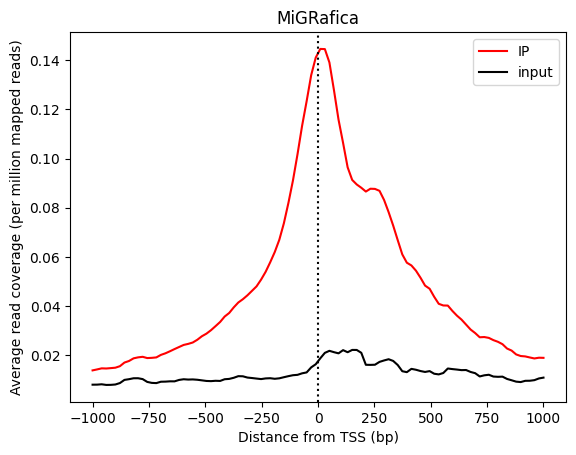

In [7]:
arrays_ip_values,arrays_input_values = Pyntegrate.SeqSignalAnalysis.values_array(array_ip=arrays['ip'], array_input=arrays['input'])
x = np.linspace(-1000, 1000, bins)
fig = Pyntegrate.SeqSignalAnalysis.distance_from_tss_chipSeq(arrays_ip=arrays_ip_values, arrays_input=arrays_input_values,xAxes=x, name="MiGRafica")

En esta gráfica se puede observar como en el eje y se tienen los valores de las señales de IP e INPUT (la media de los subintervalos creados en la función anterior) y en el eje x se puede ver la distancia que hay con los TSS.

Ahora, vamos a calcular los picos de CHIP-seq y se van a crear las sigueintes gráficas que son mapas de calor.

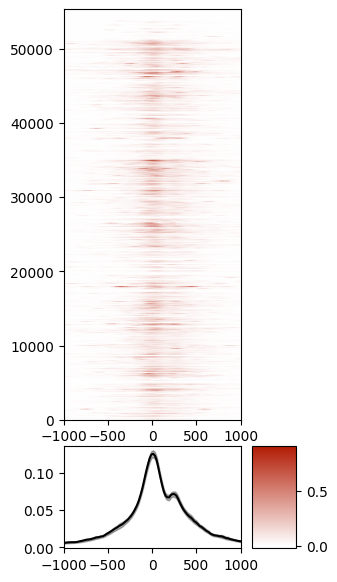

In [9]:
normalized_subtracted = Pyntegrate.SeqSignalAnalysis.calculate_peaks_with_gene_name(arrays_ip=arrays['ip'], arrays_input=arrays['input'])
normalized_subtracted_values = Pyntegrate.SeqSignalAnalysis.calculate_peaks(arrays_ip=arrays_ip_values, arrays_input=arrays_input_values)

fig = Pyntegrate.SeqSignalAnalysis.heatmap_no_sorted(signal_values=normalized_subtracted_values, xAxis=x)

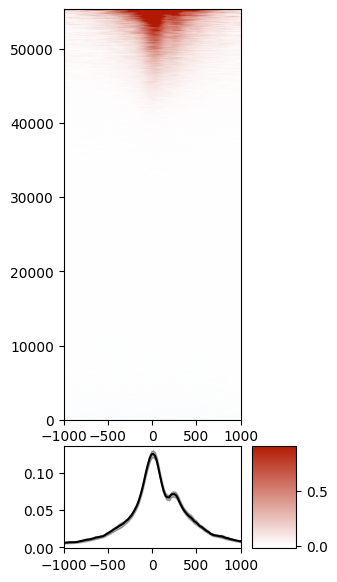

In [10]:
fig = Pyntegrate.SeqSignalAnalysis.heatmap_sorted_by_meanValues(signal_values=normalized_subtracted_values, xAxis=x)

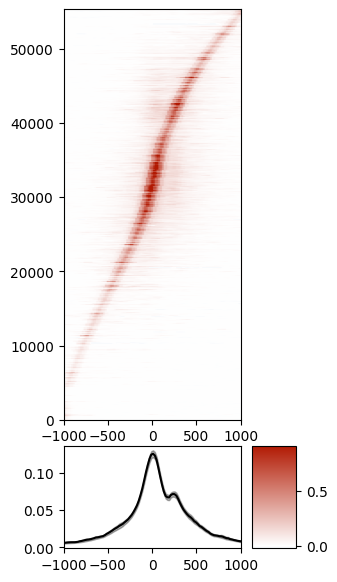

In [11]:
fig = Pyntegrate.SeqSignalAnalysis.heatmap_sorted_by_maxValueIndex(signal_values=normalized_subtracted_values, xAxis=x)

## Añadiendo RNA-seq para combinarlo con CHIP-seq

Lo primero que se tiene que hacer es cargar los datos. Para ello, se estan usando unos datos de tipo DEseq2, los cuales son aceptados y tienen una clase propia en Pyntegrate.
Una vez se tienen estos datos cargados, se tienen que reindexar para que coincidan los genes con CHIP-seq. Para ello se usa la función reindex_to que tiene la propia clase de DEseq2.

In [13]:
data = Pyntegrate.results_table.DEseq2Results('/home/jerry/Documentos/Python3.10/prueba/realData/desq2_Sanchez.csv')
data.reindex_to(tsses, attribute='gene_name')

,gene_name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
4933401J01Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gm26206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Xkr4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gm18956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gm37180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
mt-Nd6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mt-Te,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mt-Cytb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mt-Tt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por último, para crear la figura que combina ambos tipos de datos, nos tenemos que guardar los genes coincidentes de CHIP-seq y RNA-seq ya que, si existen genes que no coinciden, va a dar errores por problemas de tamaños de arrays a la hora de crear la gráfica.
Es importante saber que en Pyntegrate cuando se usa los valores de la columna de log2FoldChange de RNA-seq, siempre tiene que estar puesto de la siguiente forma para que no de error: 'log2foldchange'. Por eso, se crea una columna con ese nombre para quedarme los mismo datos en esa columna con ese nombre específico.
Una vez se tienen los datos bien ordenados y limpios, se sacan los valores de CHIP-seq y se llama a la función para crear la gráfica.

Len signal 14430
Data type:  <class 'Pyntegrate.results_table.DEseq2Results'> 
 data filtered_type <class 'pandas.core.frame.DataFrame'>
Data lenght after filtered: 14430


/tmp/ipykernel_83368/3011079307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.data['log2foldchange'] = data.data['log2FoldChange']


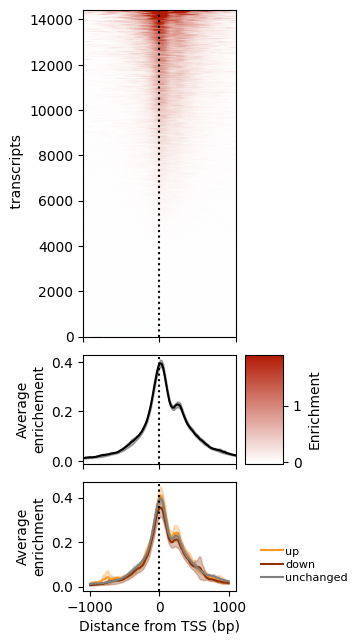

In [16]:
normalized_subtracted, data = Pyntegrate.SeqSignalAnalysis.chip_or_atac_genes_not_used_with_rna(data,
                                                                                                normalized_subtracted,
                                                                                                id="gene_name",
                                                                                                rna_column_name="gene_name",
                                                                                                delete_no_peaks=False)
data.data['log2foldchange'] = data.data['log2FoldChange']
values = Pyntegrate.SeqSignalAnalysis.value_array_simple(normalized_subtracted)
fig = Pyntegrate.SeqSignalAnalysis.atac_or_chip_with_rna(signal_values=values, rna=data, xAxis=x)